## Week 4: Reversed Markov Chain and Metropolis Hastings Algorithm

* Extracting and empirically studying the reversed process
* The Metropolis Hastings Algorithm 

### Time Reversal

In class, we introduced the time reversal of a Markov Chain $(X_n)_{0\leq n \leq N}$, by considering the process $(Y_n)_{0\leq n \leq N}$ where $Y_n = X_{N-n}$. 

By using simulations, let's study how trajectories of the reversed process look like. Using previous codes, we can first generate trajectories from a Markov Chain defined by its transition matrix

We now extract the reversed trajectories 

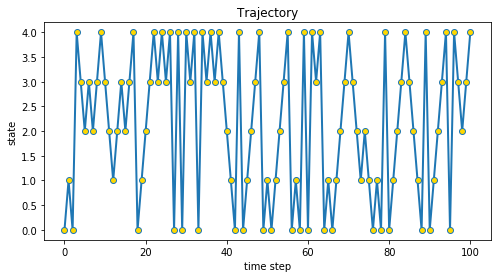

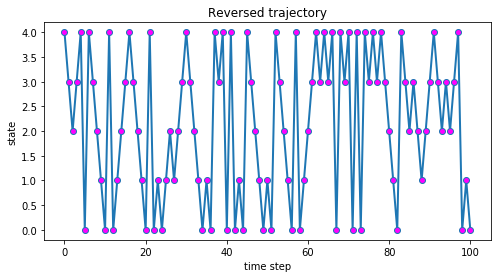

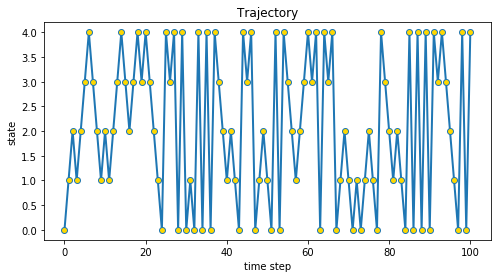

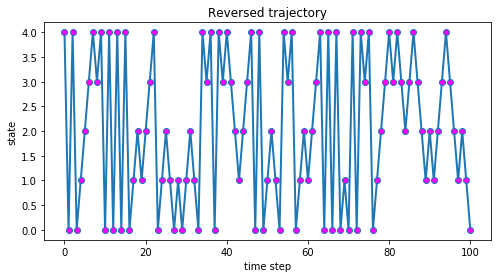

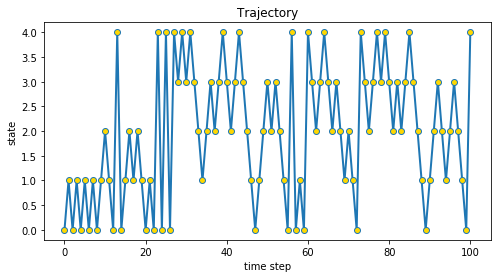

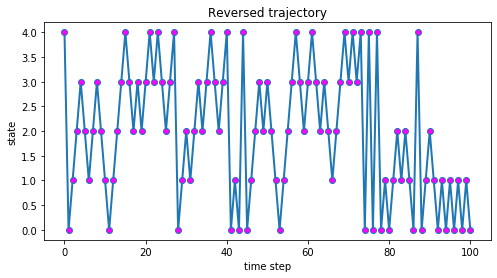

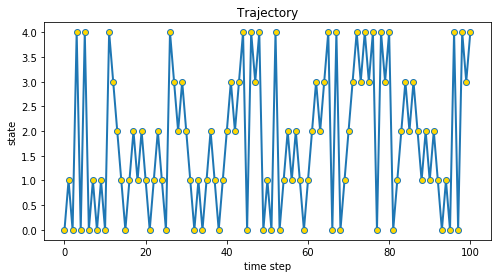

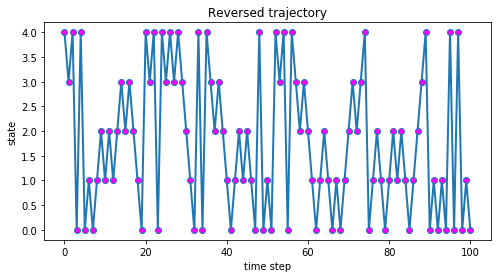

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def get_realizations(states, x0, transitionmatrix, nrealizations, N):
    # realization list
    realizations = []
    
    for r in range(nrealizations):
        # state array
        x_array = np.zeros(N+1)
        # initialization
        x_array[0] = x0
        for i in range(N):
            current = x_array[i]
            # compute next state
            x_array[i+1] = np.random.choice(states, p=transitionmatrix[int(current), :])
        realizations.append(x_array)
        
    return realizations

def reverse_realizations(realizations):
    # reversed realization list
    revrealizations = []
    
    for x_array in realizations:
        revrealizations.append(x_array[::-1])
    
    return revrealizations

# setting parameters

# number of steps
N = 100
# number of realizations
nrealizations = 500
# possible states
states = [0, 1, 2, 3, 4]
# initial state
x0 = states[0]

# Define your transition matrix (modify!)
transitionmatrix = np.array([[0,   1/2.,    0,   0,  1/2.],
                             [1/2.,   0,  1/2.,  0,    0 ],
                             [0,    1/2.,   0, 1/2.,   0 ],
                             [0,      0,  1/2.,  0,  1/2.],
                             [1/2.,   0,    0, 1/2.,    0]])  # reversible MC

realizations = get_realizations(states, x0, transitionmatrix, nrealizations, N)
revrealizations = reverse_realizations(realizations)
    
# plotting some of the realizations
for r in range(4):
    fig0, ax0 = plt.subplots(1, 1, figsize=(8, 4))
    ax0.set_title("Trajectory")
    ax0.set_xlabel("time step")
    ax0.set_ylabel("state")
    ax0.plot(np.arange(N+1), realizations[r], lw=2, marker="o", mfc="gold")

    fig1, ax1 = plt.subplots(1, 1, figsize=(8, 4))
    ax1.set_title("Reversed trajectory")
    ax1.set_xlabel("time step")
    ax1.set_ylabel("state")
    ax1.plot(np.arange(N+1), revrealizations[r], lw=2, marker="o", mfc="magenta")


Let's empirically estimate the transition probability $P(Y_{n+1}=j | Y_{n}=i)$ from the observed trajectories.

In [12]:
# helper function computing P(X(n+1)=j|X(n)=i)
def probij(realizations, i, j, n):
    icounter = 0
    ijcounter = 0
    for x_array in realizations:
        if x_array[n] == i:
            icounter += 1
            ijcounter += (x_array[n+1] == j)
    return ijcounter/icounter

# play around with the following parameters
n = 2
i = states[0]
j = states[4]

print("P(Y(n+1)=j|Y(n)=i) =", probij(revrealizations, i, j, n))

P(Y(n+1)=j|Y(n)=i) = 0.3786407766990291


Consider another example of a Markov chain.

In [13]:
# number of steps
N = 100
# number of realizations
nrealizations = 1000

# possible states
states = [0, 1, 2]
# initial state
x0 = states[0]
# considering
n = 2
# conditioning on state
i = 0
# state at step n+1
j = 1

# realization list
realizations = []
# reversed
revrealizations = []

# take the transition matrix from the lecture
p = 1/3.
transitionmatrix = np.array([[0,     p, 1-p],
                             [1-p,   0,   p],
                             [p,   1-p,   0]])

realizations = get_realizations(states, x0, transitionmatrix, nrealizations, N)
revrealizations = reverse_realizations(realizations)

print("P(X(n+1)=1|X(n)=0) = ", probij(realizations, i, j, n))
print("P(Y(n+1)=1|Y(n)=0) = ", probij(revrealizations, i, j, n))
print("\n")
print(("Although this is not a formal proof, one can clearly see that "
       "this Markov chain is not reversible."))


P(X(n+1)=1|X(n)=0) =  0.3605769230769231
P(Y(n+1)=1|Y(n)=0) =  0.7021943573667712


Although this is not a formal proof, one can clearly see that this Markov chain is not reversible.


### The Metropolis Hastings Algorithm (Practice Problem)

The ergodic theorem seen in class has some very important applications. Let's consider here a (target) distribution $\pi$ with state space $S$, which we want to sample from. To do so, we introduce a (conditional) distribution $q(x|x_i)$ defined for all $x_i \ \in \ S$, and apply the following algorithm (Metropolis Hastings):

1. Initialize $x_0$, and do for $i\in \{0, 1,..., n\}$:
2. Sample $\tilde{x} \sim q(x|x_i)$ (proposed value $\tilde{x}$)
3. Calculate the acceptance probability $P(x_i|\tilde{x}) = \min \left\{ 1 , \dfrac{\pi(\tilde{x})q(x_i|\tilde{x})}{\pi(x_i)q(\tilde{x}|x_i)} \right\}$
4. Sample $\mu$ from Uniform([0,1]) 
5. If $\mu \leq P(x_i|\tilde{x})$, accept new state: $x_{i+1} = \tilde{x}$ 
6. If $\mu > P(x_i|\tilde{x})$, reject new state: $x_{i+1} = x_{i}$
7. Output $(x_0, \ldots , x_n)$ after $n$ runs

This stochastic algorithm defines a Markov Chain (exercise: find the transition probabilities), and besides, one can show that it is ergodic and time reversible (exercise, or see Ross 4.8). We thus know that it converges to a unique stationary distribution, and one can also show that the stationary distribution is $\pi$. The algorithm is very useful since we explore the full state space to a larger extent than we would do when sampling from the target distribution itself.

By simulating the algorithm for $n$ large enough, we thus obtain a sample of the target distribution $\pi$, which only requires knowing the ratio $\frac{\pi(x)}{\pi(y)}$ for all $(x,y) \in S^2$ (cf. step 3). This algorithm extends to the case where the target distribution is continuous, and the following block provides a classical implementation, with the conditional distribution for the proposed value being Gaussian: $q(x|x_i) \sim \mathcal{N(x_i, \sigma^2)}$. Note that since $q$ is symmetric ($q(x|y)=q(y|x)$), the acceptance probability simplifies to $P(x_i|\tilde{x}) = \min \left\{ 1 , \dfrac{\pi(\tilde{x})}{\pi(x_i)} \right\}$.

In [15]:
def metropolis_hastings(nruns, x0, sigma, target_pdf):
    # state array
    x_array = np.zeros(nruns+1)
    # initialization
    x_array[0] = x0
    
    for i in range(nruns):
        # sample from Gaussian
        xi = x_array[i]
        x_next = np.random.normal(xi, sigma)
        # acceptance probability
        accept_prob = min(1, target_pdf(x_next)/target_pdf(xi))
        # get mu ~ Unif([0,1])
        mu = np.random.uniform(0,1)
        if mu > accept_prob:
            # reject sampled state
            x_next = xi
        
        x_array[i+1] = x_next
        
    return x_array

Let's plot the trajectory of the MC from applying the algorithm to sample a Gamma distribution (Note that we don't need to know how to compute the Gamma function, which appears in the demoninator of the pdf)

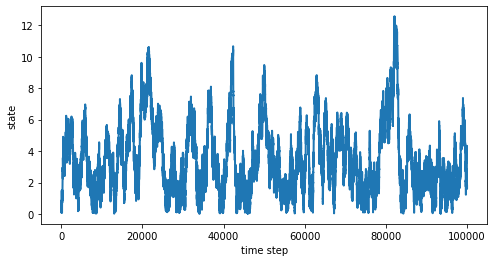

In [16]:
import scipy.stats as st

# specify the number of runs
n = 100000
# standard deviation
sigma = 0.1
# initial point
x0 = 0.5

# specify the Gamma distribution
shape = 2.
scale = 2.

x_array = metropolis_hastings(n, x0, sigma, lambda x: st.gamma.pdf(x, a=shape, scale=scale))
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_xlabel("time step")
ax.set_ylabel("state")
ax.plot(np.arange(n+1), x_array, lw=2)

Let's compare the histogram of samples with the theoretical distribution

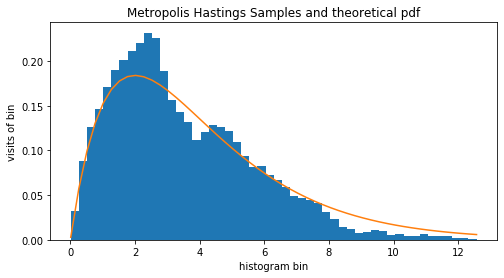

In [18]:
import scipy.stats as st

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title("Metropolis Hastings Samples and theoretical pdf")
ax.set_xlabel("histogram bin")
ax.set_ylabel("visits of bin")
x, bins, p = plt.hist(x_array, 50, density=True)
    
# compare to the theoretical probability density function
gamma_pdf = st.gamma.pdf(bins, shape, scale=scale)
plt.plot(bins, gamma_pdf)


You can play with this script with different distributions, or change the parameters of the algorithm (see Homework). The Metropolis Hastings algorithm is a fundamental example of so-called Monte Carlo Markov Chain (MCMC) Methods, which have applications in all kinds of fields.

## Solution to Problem 5:  <br/>
### 5.1:

(a) Exponential distribution

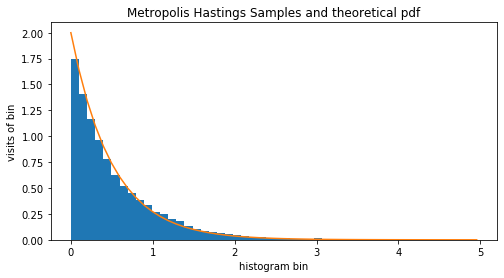

In [19]:
import scipy.stats as st

# specify the number of runs
n = 100000
# standard deviation
sigma = 0.1
# initial point
x0 = 0.5

# specify the Exponential distribution
scale = 1/2.

x_array = metropolis_hastings(n, x0, sigma, lambda x: st.expon.pdf(x, scale=scale))

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title("Metropolis Hastings Samples and theoretical pdf")
ax.set_xlabel("histogram bin")
ax.set_ylabel("visits of bin")
x, bins, p = plt.hist(x_array, 50, density=True)
    
# compare to the theoretical probability density function
expon_pdf = st.expon.pdf(bins, scale=scale)
plt.plot(bins, expon_pdf)

(b) Beta distribution

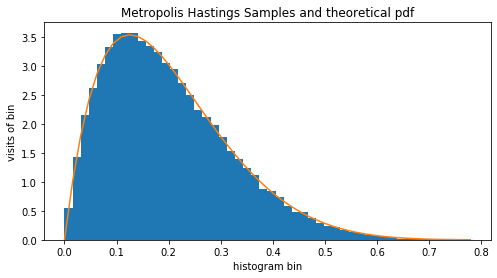

In [20]:
# specify the Beta distribution
alpha = 2.
beta = 8.

x_array = metropolis_hastings(n, x0, sigma, lambda x: st.beta.pdf(x, a=alpha, b=beta))

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title("Metropolis Hastings Samples and theoretical pdf")
ax.set_xlabel("histogram bin")
ax.set_ylabel("visits of bin")
x, bins, p = plt.hist(x_array, 50, density=True)
    
# compare to the theoretical probability density function
beta_pdf = st.beta.pdf(bins, a=alpha, b=beta)
plt.plot(bins, beta_pdf)


(c) Weibull distribution

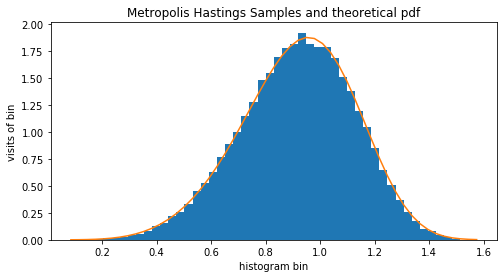

In [21]:
# specify the Weibull distribution
shape = 5.

x_array = metropolis_hastings(n, x0, sigma, lambda x: st.weibull_min.pdf(x, shape))

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title("Metropolis Hastings Samples and theoretical pdf")
ax.set_xlabel("histogram bin")
ax.set_ylabel("visits of bin")
x, bins, p = plt.hist(x_array, 50, density=True)
    
# compare to the theoretical probability density function
weibull_pdf = st.weibull_min.pdf(bins, shape)
plt.plot(bins, weibull_pdf)

### 5.2:

In [24]:
def metropolis_hastings_rejections(nruns, x0, sigma, target_pdf):
    # state array
    x_array = np.zeros(nruns+1)
    # initialization
    x_array[0] = x0
    
    nrejections = 0
    
    for i in range(nruns):
        # sample from Gaussian
        xi = x_array[i]
        x_next = np.random.normal(xi, sigma)
        # acceptance probability
        accept_prob = min(1, target_pdf(x_next) / target_pdf(xi))
        # get mu ~ Unif([0,1])
        mu = np.random.uniform(0,1)
        
        if mu > accept_prob:
            # reject sampled state
            nrejections += 1
            x_next = xi
        
        x_array[i+1] = x_next
        
    return nrejections

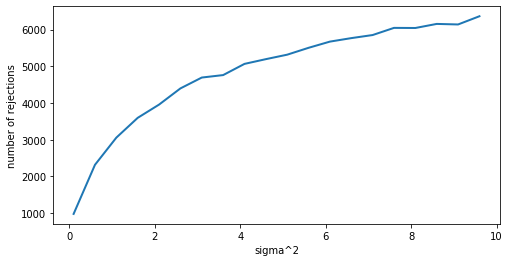

In [25]:
import scipy.stats as st

# specify the number of runs
nruns = 10000
# initial point
x0 = 0.5

# vary the variance
sigma_squa_array = np.arange(0.1, 10, step=0.5)
sigma_array = np.sqrt(sigma_squa_array)

rejections_array = np.zeros(len(sigma_array))

for idx, sigma in enumerate(sigma_array):
    rejections_array[idx] = metropolis_hastings_rejections(nruns, x0, sigma, lambda x: 1/(2*np.sqrt(2*np.pi))*(np.exp(-x**2/2)+np.exp(-(x-10)**2/2)))

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_xlabel("sigma^2")
ax.set_ylabel("number of rejections")
ax.plot(sigma_squa_array, rejections_array, lw=2)
                                                         

For an increasing variance $\sigma^2$ for $q(x|x_i) \sim \mathcal{N}(x_i, \sigma^2)$ the number of rejections is high since $q$ spreads out and hence the maximum value of the pdf to $q$ decreases.<br/>
Let us now take $q \sim {\rm Unif}([-a,a])$ for $a>0$, modify our algorithm accordingly and compare the results to the last plot above.

In [26]:
def mh_rejections_unif(nruns, x0, a, target_pdf):
    # state array
    x_array = np.zeros(nruns+1)
    # initialization
    x_array[0] = x0
    
    nrejections = 0
    
    for i in range(nruns):
        # sample from Gaussian
        xi = x_array[i]
        x_next = np.random.uniform(-a,a)
        # acceptance probability
        accept_prob = min(1, target_pdf(x_next)  / 
                             (target_pdf(xi) ))
        # get mu ~ Unif([0,1])
        mu = np.random.uniform(0,1)
        
        if mu > accept_prob:
            # reject sampled state
            nrejections += 1
            x_next = xi
        
        x_array[i+1] = x_next
        
    return nrejections

Now let us plot the number of rejections for different $a$.

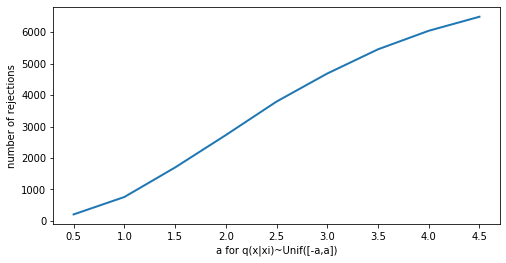

In [27]:
a_array = np.arange(0.5, 5, step=0.5)
rejections_array = np.zeros(len(a_array))

for idx, a in enumerate(a_array):
    rejections_array[idx] = mh_rejections_unif(nruns, x0, a, lambda x: 1/(2*np.sqrt(2*np.pi))*(np.exp(-x**2/2)+np.exp(-(x-10)**2/2)))

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_xlabel("a for q(x|xi)~Unif([-a,a])")
ax.set_ylabel("number of rejections")
ax.plot(a_array, rejections_array, lw=2)    

We see that for a low variance $\sigma^2$ the former choice for the distribution of $q(x|x_i)$ works better than the latter for this specific target distribution with pdf $\sim e^{\frac{x^2}{2}}+e^{\frac{(x-10)^2}{2}}$. The more the pdf to $q$ is spreading in space, the more likely are rejections in the Metropolis Hastings algorithm. That is, the algorithm is more successful for distributions of $q(x|x_i)$ closer to the target distribution.